In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [2]:
file = "Sam-Smith-Fire-on-Fire.wav"
signal, sample_rate = librosa.load(file, sr=22050)

Text(0.5, 1.0, 'Waveform')

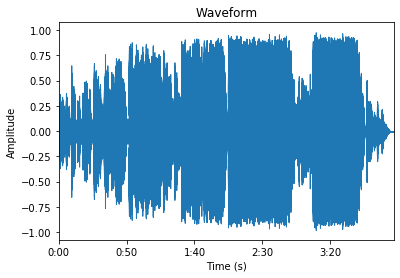

In [4]:
librosa.display.waveplot(signal, sample_rate)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

Text(0.5, 1.0, 'Waveform')

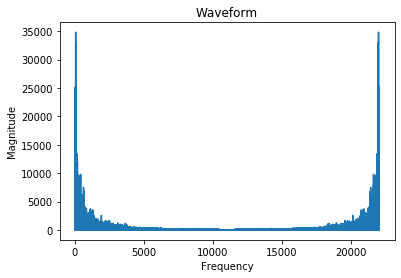

In [6]:
# FFT -> power spectrum
# perform Fourier transform

fft = np.fft.fft(signal)
magnitude = np.abs(fft)

#linspace ----  number of evenly placed numbers in an interval

frequency = np.linspace(0, sample_rate, len(magnitude))

plt.plot(frequency,magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Waveform")

Text(0.5, 1.0, 'Waveform')

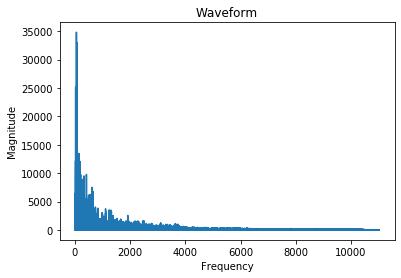

In [7]:
# since we only need half the graph as other side is symmetric
left_magnitude = magnitude[:int(len(frequency)/2)]
left_frequency = frequency[:int(len(frequency)/2)]
plt.plot(left_frequency,left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Waveform")

Text(0.5, 1.0, 'Spectrogram')

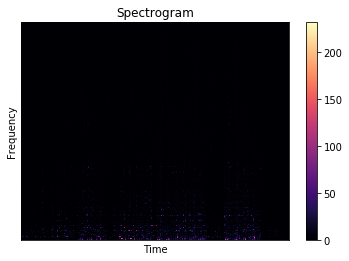

In [10]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

Text(0.5, 1.0, 'Spectrogram (dB)')

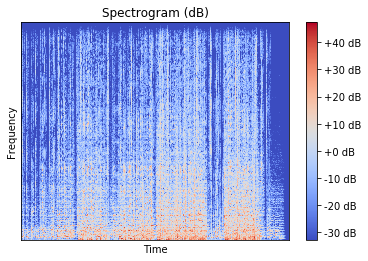

In [11]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

Text(0.5, 1.0, 'MFCC')

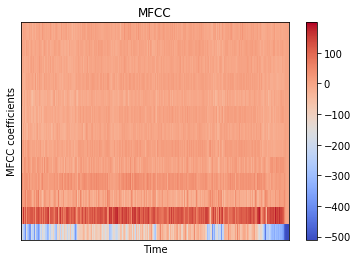

In [12]:
# MFCCs
# extracting 13 MFCCs
MFCC = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(MFCC, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCC")